<a href="https://colab.research.google.com/github/mohamedali-sc/Neural-Network-For-Handwritten-Digits-Classification/blob/master/Neural_Network_For_Handwritten_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [ ]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

In [ ]:
len(X_train)

60000

In [ ]:
X_train.shape

(60000, 28, 28)

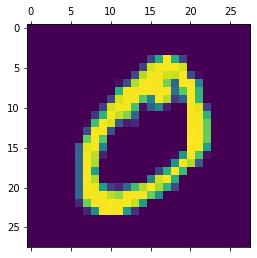

In [ ]:
plt.matshow(X_train[1])

In [ ]:
X_train=X_train/255
X_test=X_test/255


In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(1000,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])


In [ ]:
from tensorflow.python import metrics
model.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 42s 21ms/step - loss: 0.1847 - accuracy: 0.9436
Epoch 2/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0745 - accuracy: 0.9771
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0493 - accuracy: 0.9843
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0332 - accuracy: 0.9890
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0264 - accuracy: 0.9914


In [ ]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0606 - accuracy: 0.9843


[0.06058012694120407, 0.9843000173568726]

In [ ]:
Y_predict=model.predict(X_test)

313/313 [==============================] - 3s 9ms/step


In [ ]:
np.argmax(Y_predict[6])

4

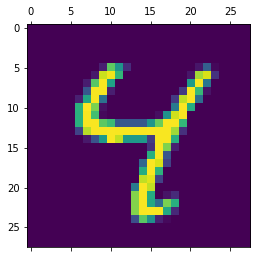

In [ ]:
plt.matshow(X_test[6])

Text(69.0, 0.5, 'Truth')

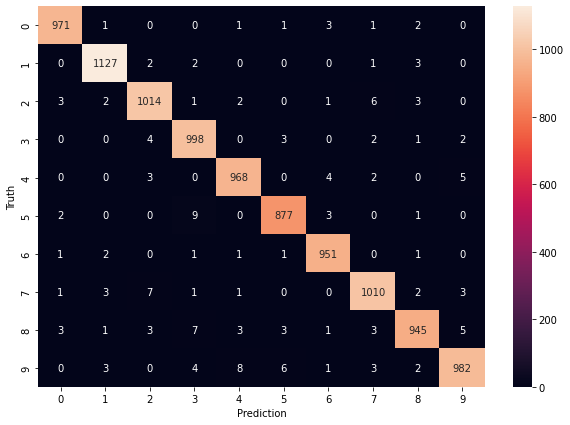

In [ ]:
import seaborn as sns
Y_predict_labels=[np.argmax(i) for i in Y_predict]
cm=tf.math.confusion_matrix(labels=Y_test,predictions=Y_predict_labels)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Prediction")
plt.ylabel("Truth")